In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 20

In [4]:
train_df = pd.read_csv('C:/Users/frank/OneDrive/Desktop/Kaggle/data/US_Accidents_Dec20_Updated.csv')

In [5]:
print(train_df.shape)
train_df.head()

(2906610, 47)


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
train_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Accidents by State

In [5]:
df_states = train_df['State'].value_counts()
df_states = df_states.sort_values(ascending = False)

<AxesSubplot:>

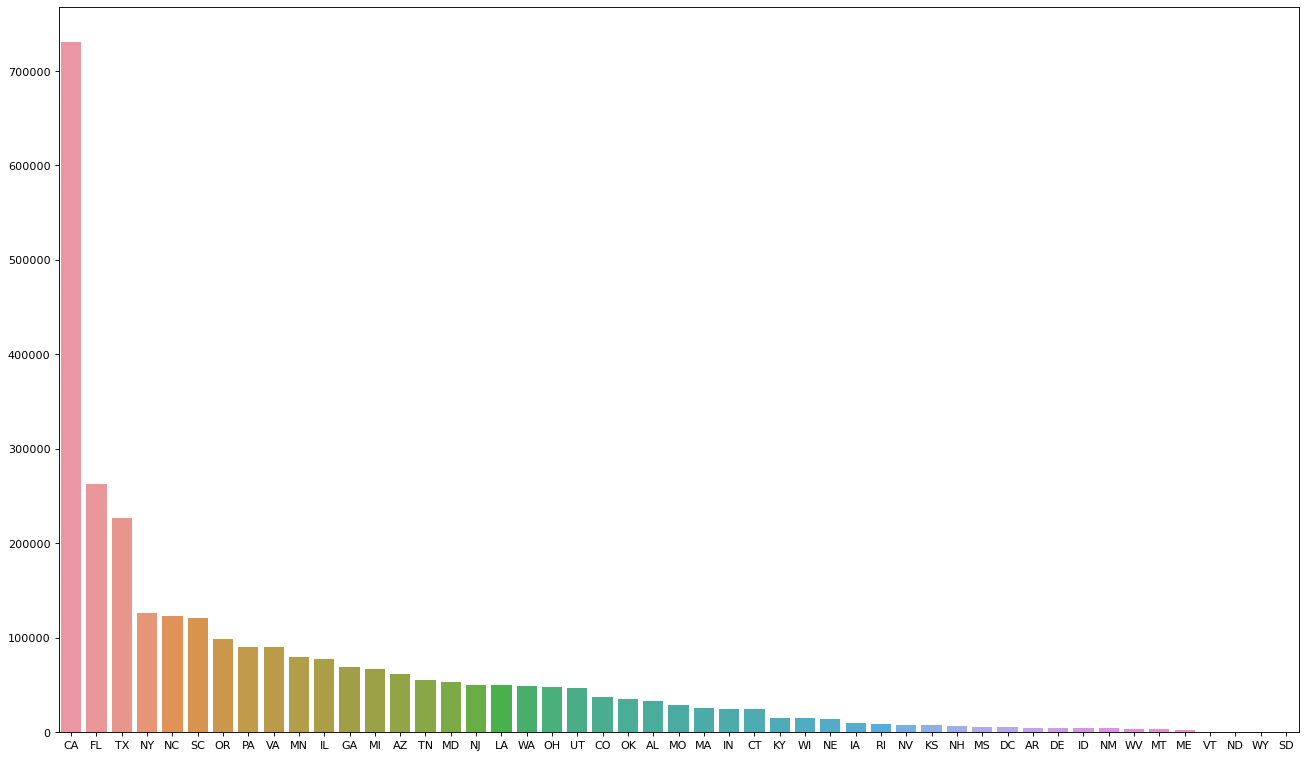

In [6]:
plt.figure(figsize=(20, 12), dpi=80)
sns.barplot(x = df_states.index, y = df_states.values)

# EDA

In [7]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count'] > 0]
missing_df = missing_df.sort_values(by = 'missing_count', ascending = False).reset_index(drop = True)

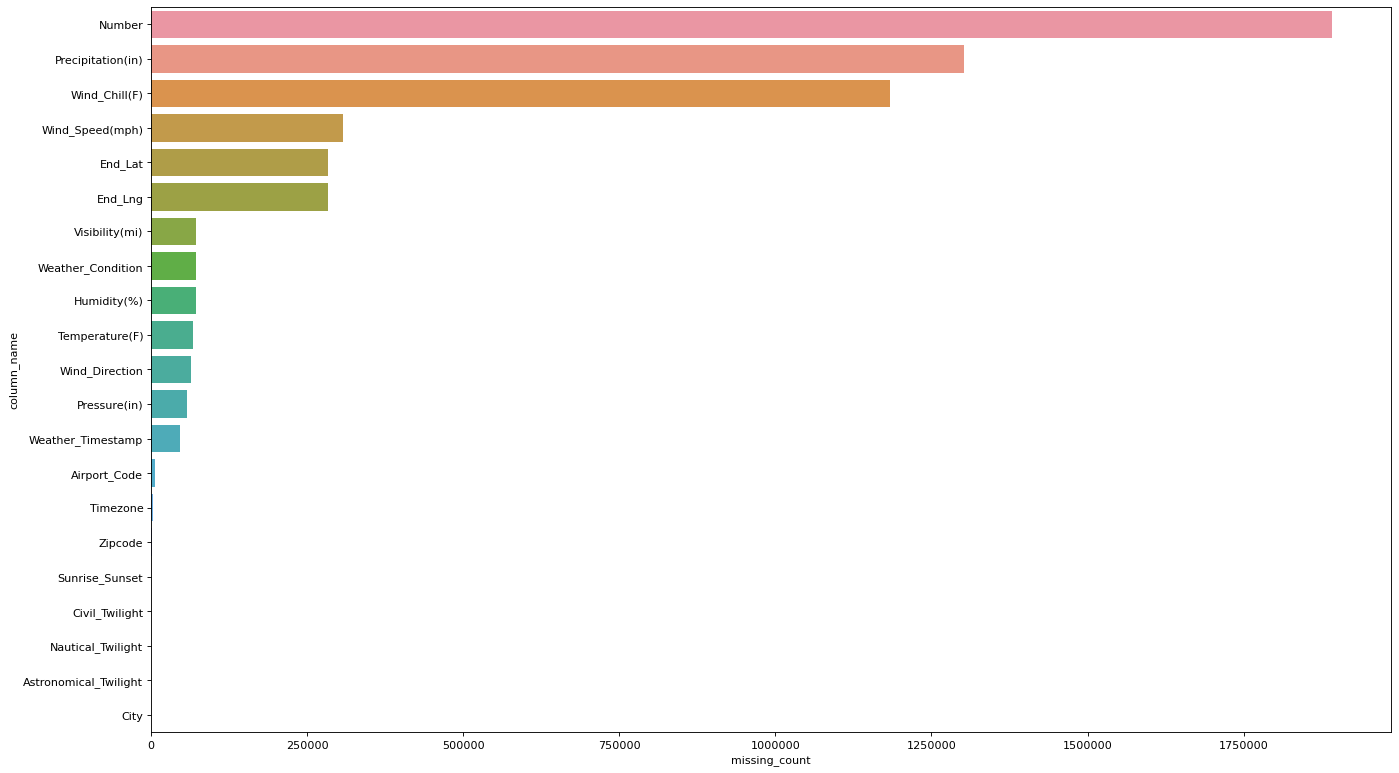

In [8]:
plt.figure(figsize=(20, 12), dpi=80)
sns.barplot(y = missing_df['column_name'], x = missing_df['missing_count'], orient = "h")
plt.ticklabel_format(style='plain', axis='x',useOffset=False)

# Lat and Lng

<Figure size 1600x640 with 0 Axes>

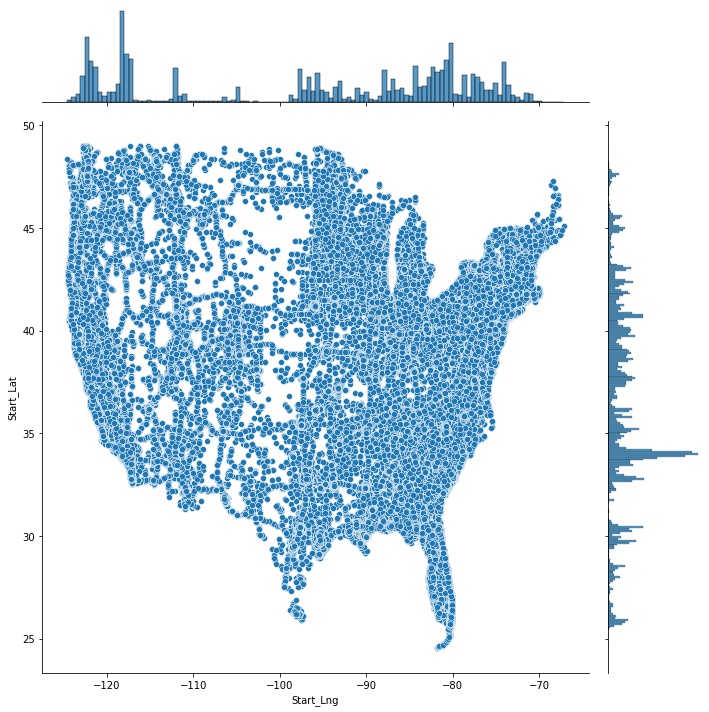

In [9]:
plt.figure(figsize=(20, 8), dpi=80)
sns.jointplot(x=train_df['Start_Lng'], height = 10, y=train_df['Start_Lat'])
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

# Weather

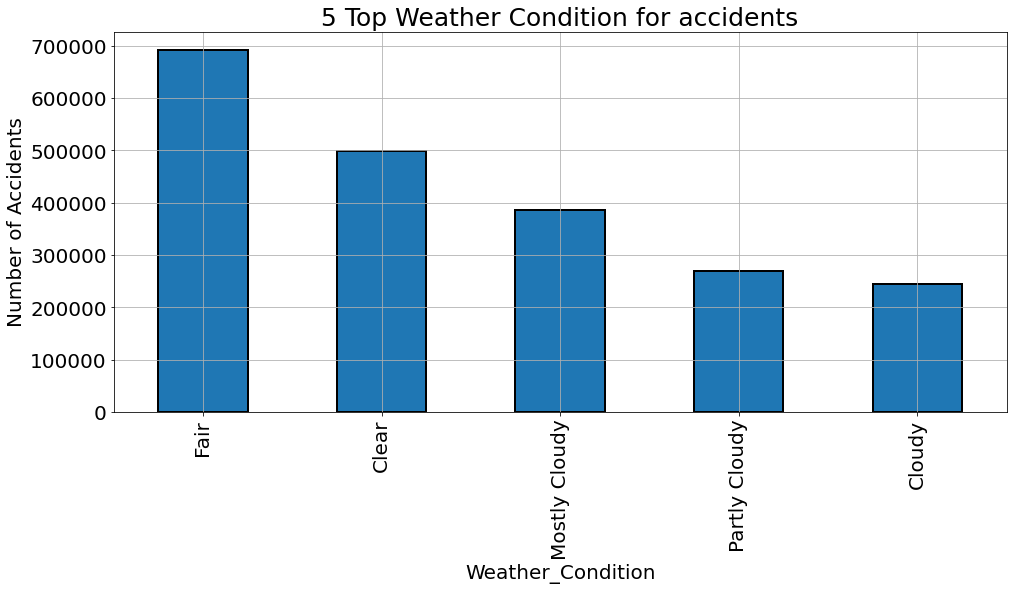

In [10]:
fig, ax=plt.subplots(figsize=(16,7))
train_df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

# Sapater the dataset based on dtype

In [11]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
#train_df.info()

,Count,Column Type
0,ID,object
1,Severity,int64
2,Start_Time,object
3,End_Time,object
4,Start_Lat,float64
5,Start_Lng,float64
6,End_Lat,float64
7,End_Lng,float64
8,Distance(mi),float64
9,Description,object


In [12]:
dtype_df.groupby("Column Type").count().reset_index()

,Column Type,Count
0,bool,13
1,int64,1
2,float64,13
3,object,20


In [13]:
missing_df['missing_ratio'] = missing_df['missing_count']/len(train_df)
missing_df[missing_df['missing_ratio'] > 0.399]

,column_name,missing_count,missing_ratio
0,Number,1891672,0.650817
1,Precipitation(in),1301326,0.447713
2,Wind_Chill(F),1183859,0.407299


In [14]:
removelist = missing_df[missing_df['missing_count'] > 250000]['column_name'].tolist()
removelist

['Number',
 'Precipitation(in)',
 'Wind_Chill(F)',
 'Wind_Speed(mph)',
 'End_Lat',
 'End_Lng']

# Update time 

In [15]:
train_df['Start_Time'] = pd.to_datetime(train_df['Start_Time'], errors='coerce')
train_df['End_Time'] = pd.to_datetime(train_df['End_Time'], errors='coerce')

train_df['Year']=train_df['Start_Time'].dt.year
train_df['Month']=train_df['Start_Time'].dt.strftime('%b')
train_df['Day']=train_df['Start_Time'].dt.day
train_df['Hour']=train_df['Start_Time'].dt.hour
train_df['Weekday']=train_df['Start_Time'].dt.strftime('%a')

In [16]:
td='Time_Duration(min)'
train_df[td] = round((train_df['End_Time']-train_df['Start_Time'])/np.timedelta64(1,'m'))

In [17]:
train_df[train_df[td] <= 0] = np.nan
train_df.dropna(subset = [td], axis = 0, inplace = True)

In [18]:
feature_lst=['Severity','Start_Lng','Start_Lat','Distance(mi)','Side','City','County','State','Timezone','Temperature(F)','Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction','Weather_Condition','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset','Hour','Weekday', 'Time_Duration(min)']
df = train_df[feature_lst].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2906610 entries, 0 to 2906609
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Severity            float64
 1   Start_Lng           float64
 2   Start_Lat           float64
 3   Distance(mi)        float64
 4   Side                object 
 5   City                object 
 6   County              object 
 7   State               object 
 8   Timezone            object 
 9   Temperature(F)      float64
 10  Humidity(%)         float64
 11  Pressure(in)        float64
 12  Visibility(mi)      float64
 13  Wind_Direction      object 
 14  Weather_Condition   object 
 15  Amenity             float64
 16  Bump                float64
 17  Crossing            float64
 18  Give_Way            float64
 19  Junction            float64
 20  No_Exit             float64
 21  Railway             float64
 22  Roundabout          float64
 23  Station             float64
 24  Stop                floa

In [26]:
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64']

In [33]:
labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(df[col].values, df['Severity'].values)[0,1])
    
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values').reset_index(drop = True)

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


# Correlation with Target Variable

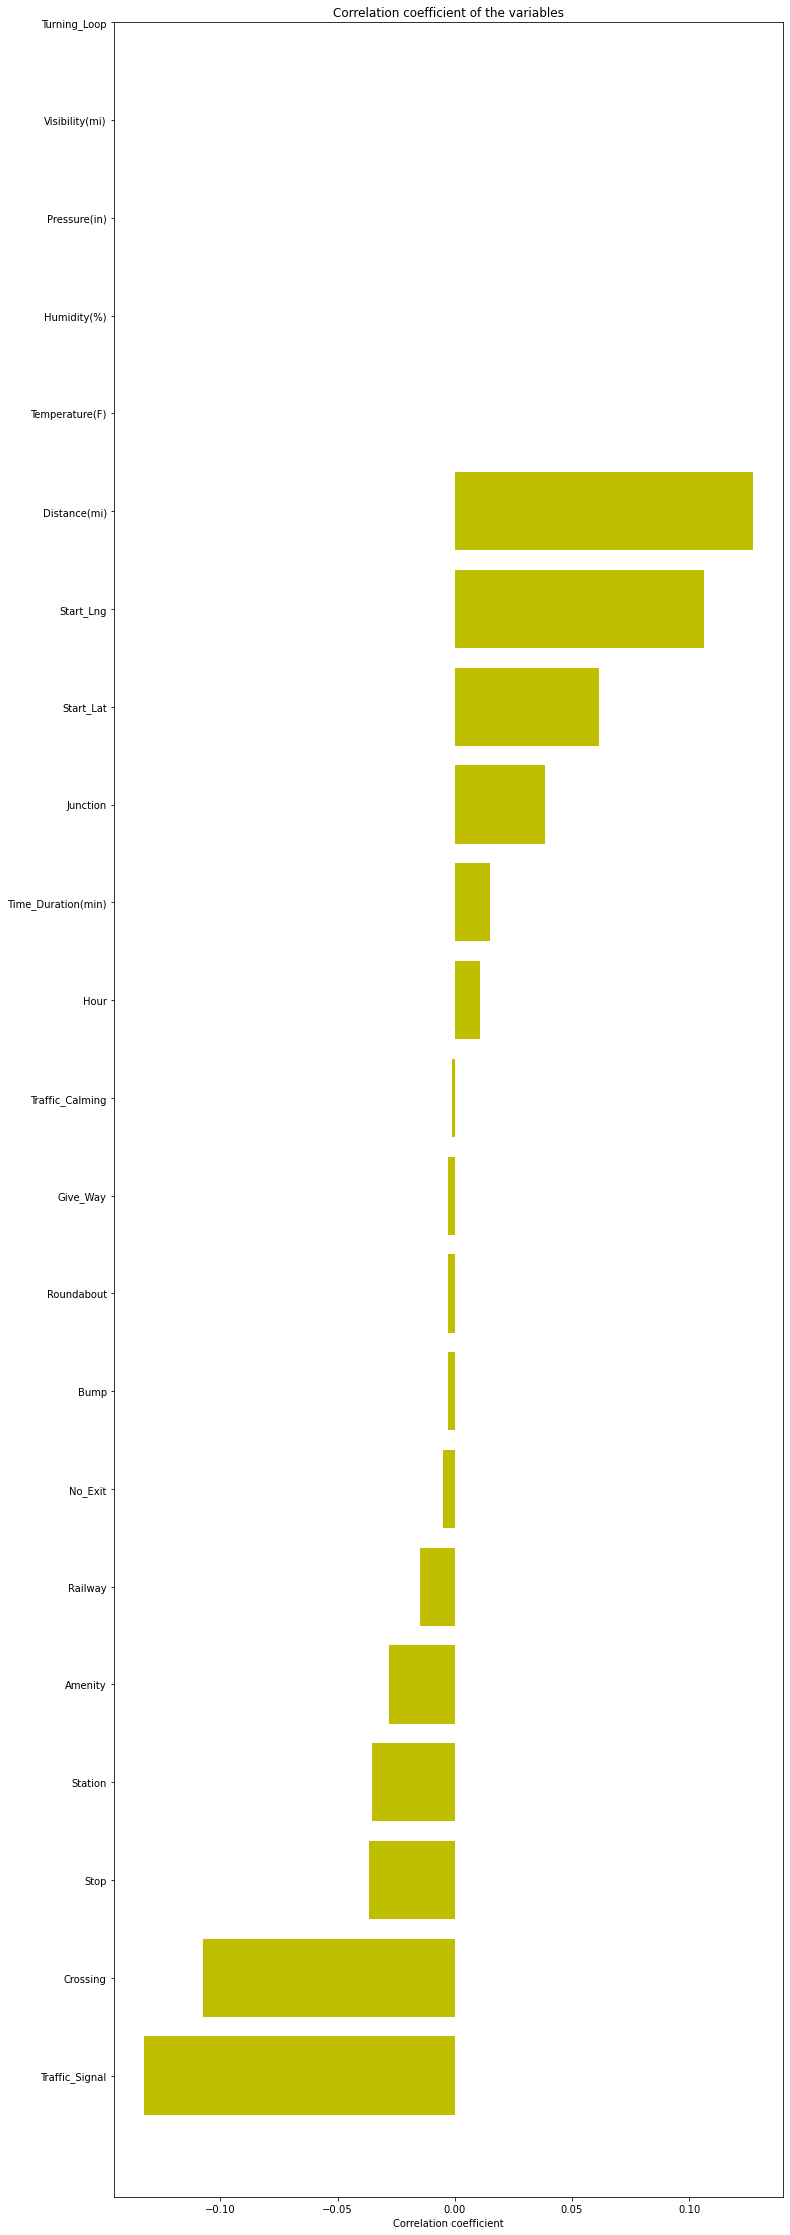

In [35]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

In [37]:
corr_zero_columns = ['Turning_Loop','Visibility(mi)','Pressure(in)','Humidity(%)','Temperature(F)']
for col in corr_zero_columns:
    print(col,len(df[col].unique()))

Turning_Loop 1
Visibility(mi) 82
Pressure(in) 1028
Humidity(%) 101
Temperature(F) 823


In [38]:
corr_df_sel = corr_df.loc[(corr_df['corr_values']>0.05) | (corr_df['corr_values'] < -0.05)]
corr_df_sel

,col_labels,corr_values
0,Traffic_Signal,-0.132553
1,Crossing,-0.107441
14,Start_Lat,0.061409
15,Start_Lng,0.106505
16,Distance(mi),0.127185


# Correlation between Features

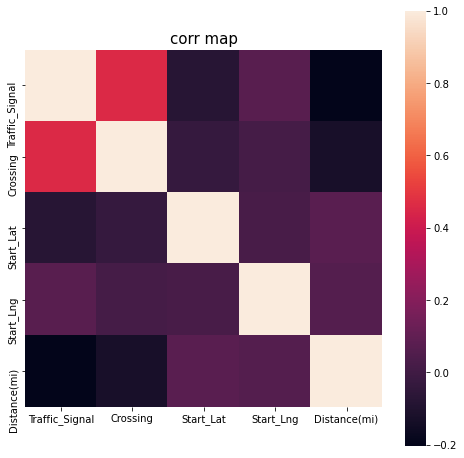

In [40]:
corr_df_ = corr_df_sel['col_labels'].tolist()

tem_df = df[corr_df_]

corrmat = tem_df.corr(method='spearman')
fig,ax= plt.subplots(figsize=(8,8))

sns.heatmap(corrmat,vmax=1,square = True)
plt.title('corr map',fontsize=15)
plt.show()

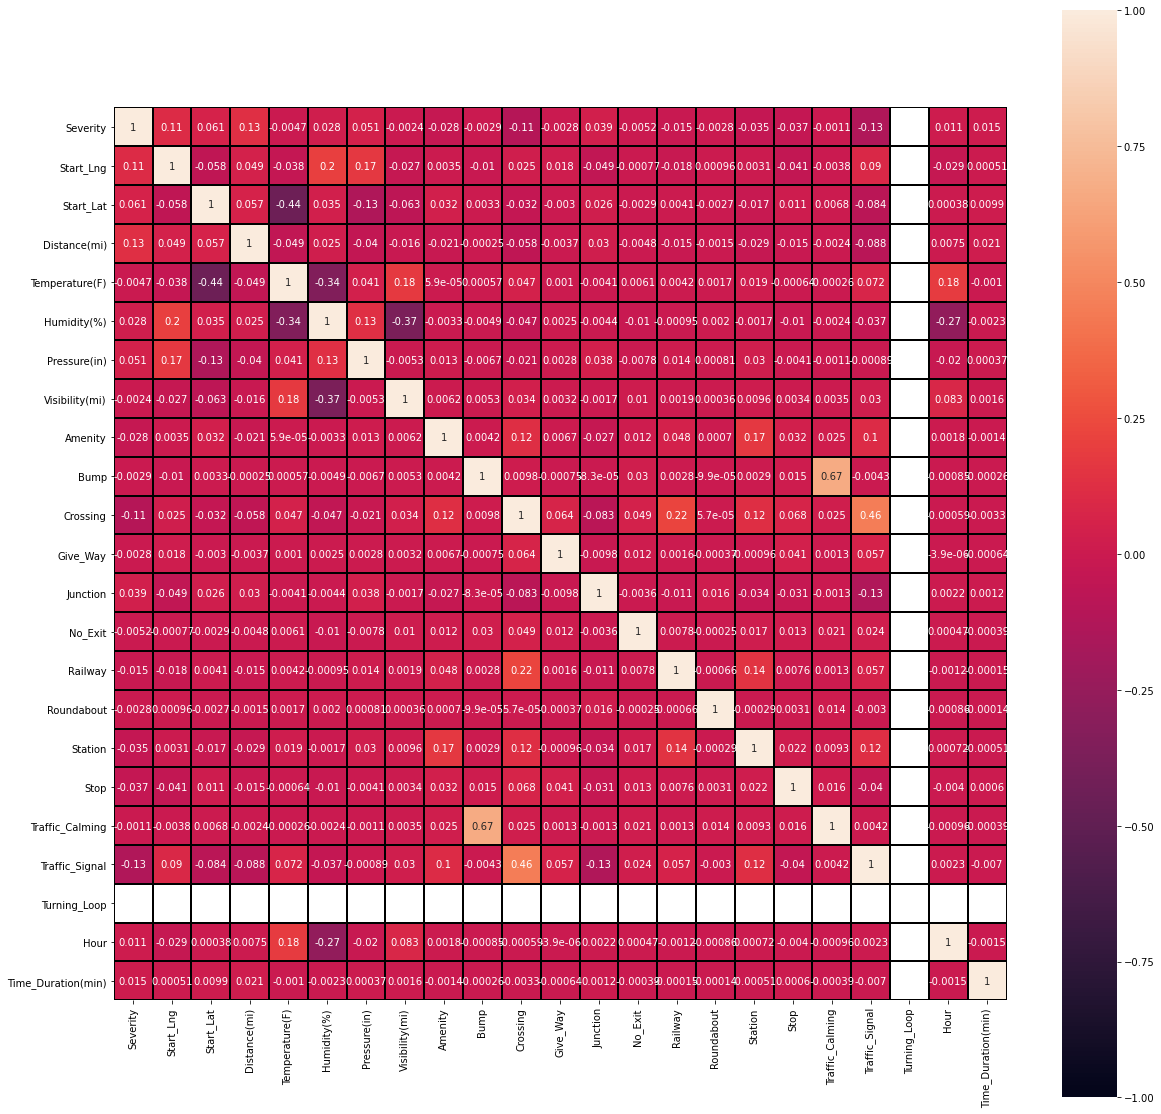

In [41]:
fig=plt.gcf()
fig.set_size_inches(20,20)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Data Distribution

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\frank\Anaconda3\e

<AxesSubplot:title={'center':'Junction'}>

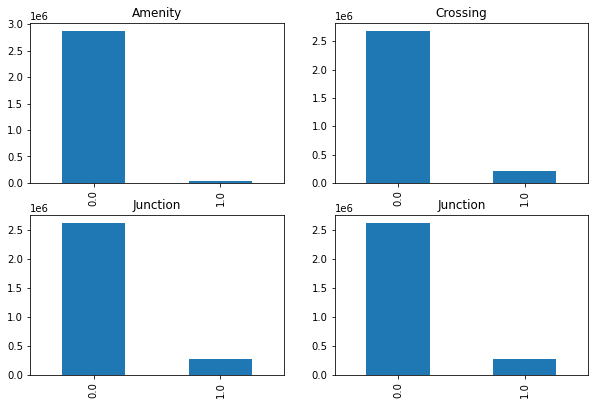

In [44]:
fig = plt.figure(figsize=(10,10)) 
fig_dims = (3, 2)


plt.subplot2grid(fig_dims, (0, 0))
df['Amenity'].value_counts().plot(kind='bar', 
                                     title='Amenity')
plt.subplot2grid(fig_dims, (0, 1))
df['Crossing'].value_counts().plot(kind='bar', 
                                     title='Crossing')
plt.subplot2grid(fig_dims, (1, 0))
df['Junction'].value_counts().plot(kind='bar', 
                                     title='Junction')
plt.subplot2grid(fig_dims, (1, 1))
df['Junction'].value_counts().plot(kind='bar', 
                                     title='Junction')

<AxesSubplot:ylabel='Severity'>

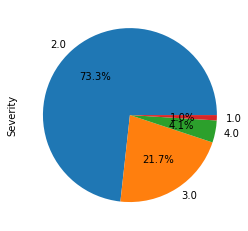

In [51]:
df['Severity'].value_counts().plot.pie(autopct = '%1.1f%%')

C:\Users\frank\Anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


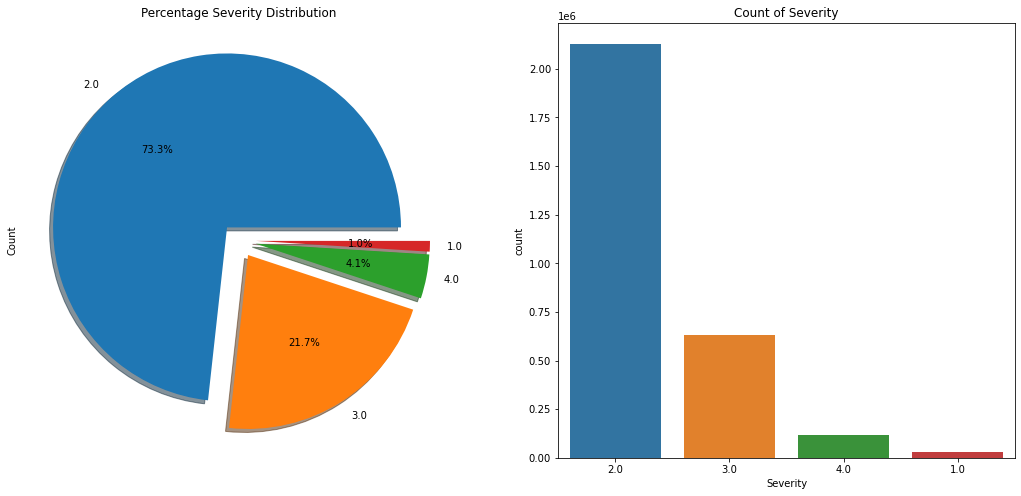

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Severity'].value_counts().plot.pie(explode = [0.1, 0.1, 0.1, 0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

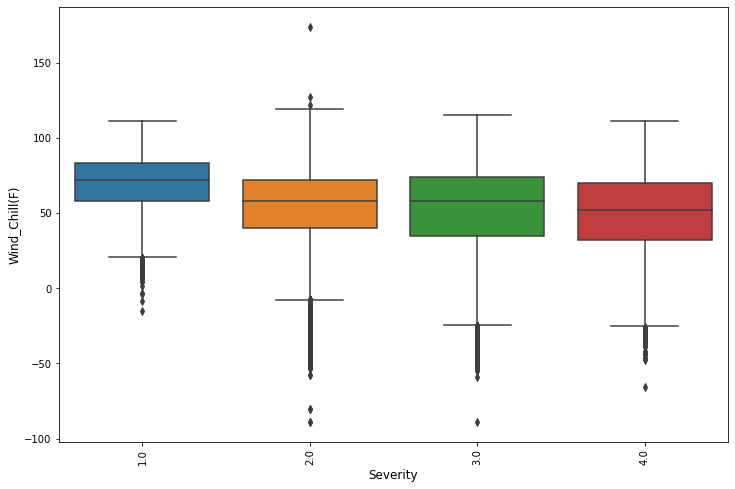

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=train_df)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

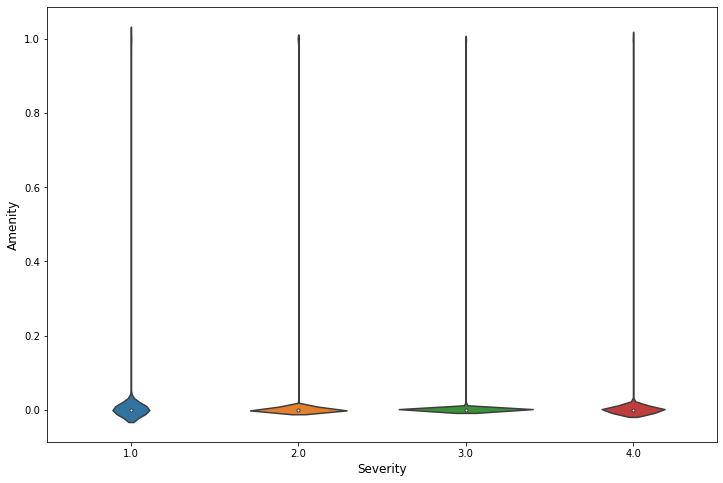

In [68]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Amenity', data=train_df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Amenity', fontsize=12)
plt.show()

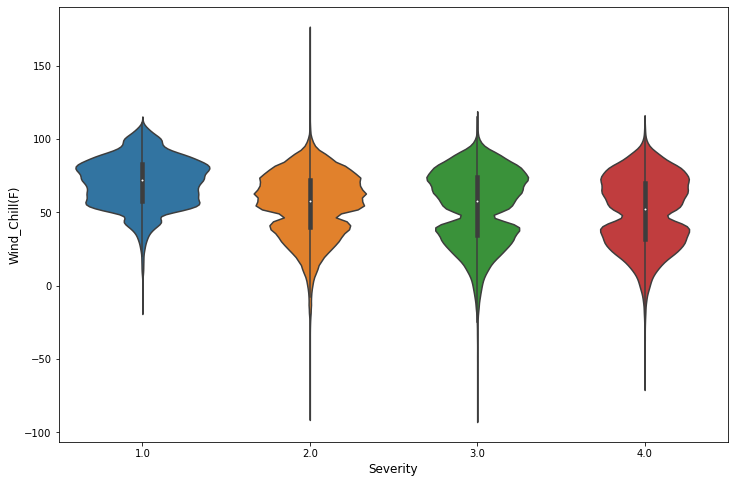

In [69]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Wind_Chill(F)', data=train_df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.show()

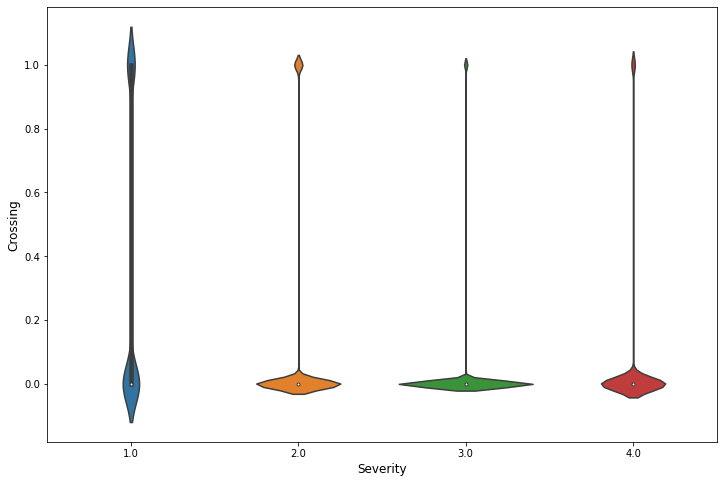

In [70]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Crossing', data=train_df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Crossing', fontsize=12)
plt.show()

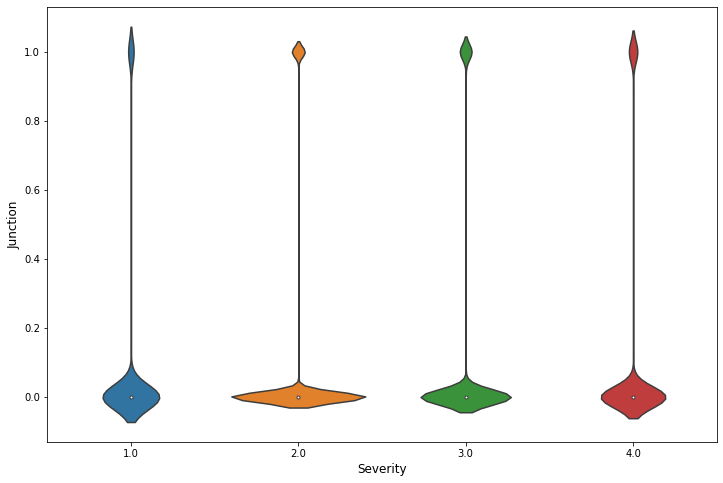

In [71]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Junction', data=train_df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Junction', fontsize=12)
plt.show()

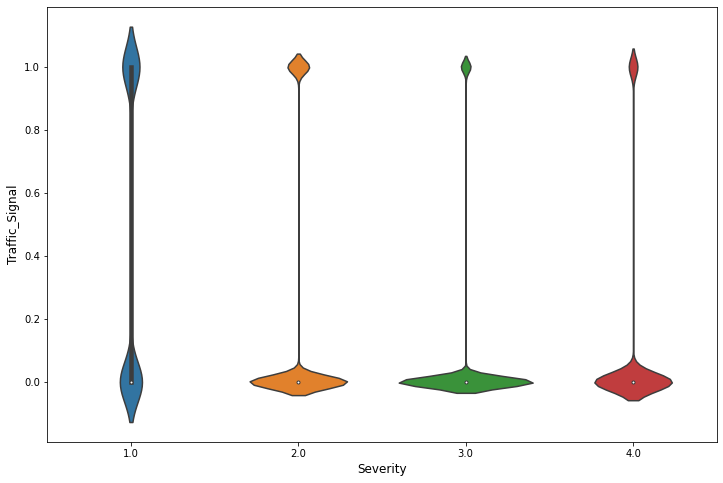

In [72]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Severity', y='Traffic_Signal', data=train_df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Traffic_Signal', fontsize=12)
plt.show()

# Feature Importance

In [73]:
df.dropna(subset=df.columns[df.isnull().mean()!=0], how='any', axis=0, inplace=True)
df.shape

(2801232, 32)

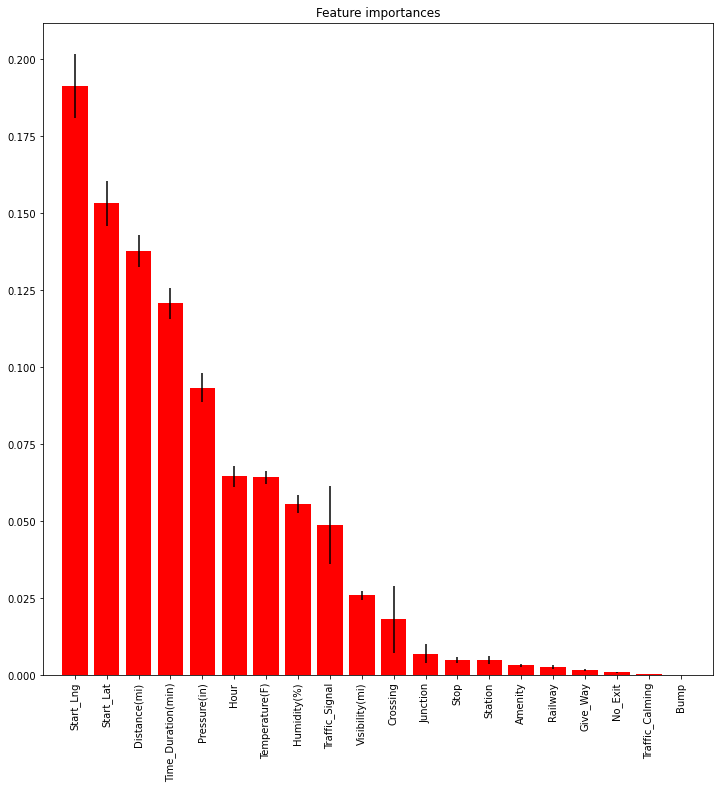

In [74]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)

#plot imp 
importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

[16:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




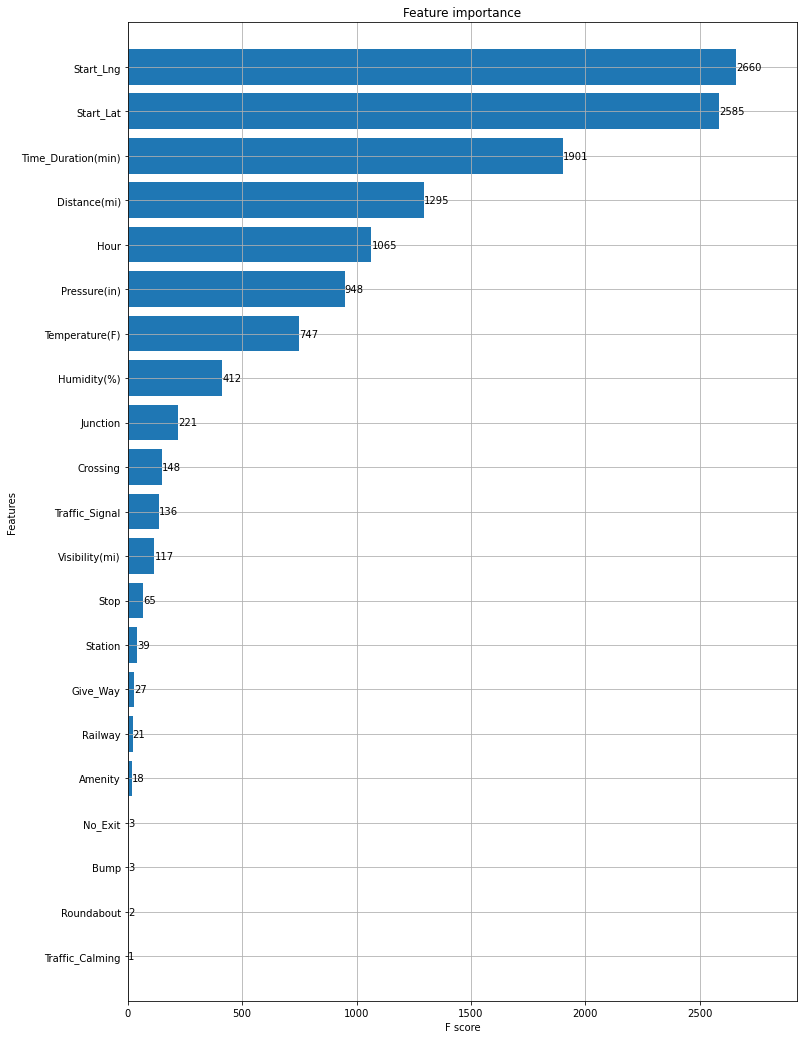

In [77]:
import xgboost as xgb 

xgb_prames = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}

dtrain = xgb.DMatrix(train_col,train_y,feature_names=train_col.columns.values)

model = xgb.train(dict(xgb_prames, silent=0), dtrain, num_boost_round=50)


fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [78]:
np.sum([True, True, False])

2

In [82]:
np.corrcoef([True, False, True], [False, True, False])

array([[ 1., -1.],
       [-1.,  1.]])